In [54]:
import numpy as np
import pandas as pd

In [55]:
data = pd.read_csv("baseball.csv")

In [56]:
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403


In [57]:
data.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [58]:
icols = ["RS","RA","W","OBP","SLG","BA"]
jcols = ["OOBP","OSLG"]

In [59]:
df1 = data[icols]
df1.head(3)

,RS,RA,W,OBP,SLG,BA
0,734,688,81,0.328,0.418,0.259
1,700,600,94,0.320,0.389,0.247
2,712,705,93,0.311,0.417,0.247


In [60]:
df2 = data[jcols]
df2.head(3)

,OOBP,OSLG
0,0.317,0.415
1,0.306,0.378
2,0.315,0.403


In [61]:
df_mb = pd.concat([df1,df2],axis=1)
df_mb.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [62]:
notnans = df_mb[jcols].notnull().all(axis=1)
df_notnans = df_mb[notnans]
df_notnans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_notnans[icols],df_notnans[jcols],test_size=0.25,random_state=4)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,random_state=0))

regr_multirf.fit(X_train,y_train)

score = regr_multirf.score(X_test,y_test)
print("Prediction score: ",score)

Prediction score:  0.7670992861863346


In [65]:
df_nans = df_mb.loc[~notnans].copy()
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,NaN,NaN
421,665,812,65,0.314,0.393,0.246,NaN,NaN
422,826,581,106,0.342,0.453,0.272,NaN,NaN


In [66]:
df_nans[jcols] = regr_multirf.predict(df_nans[icols])
df_nans.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
420,787,783,85,0.335,0.415,0.272,0.3350,0.4285
421,665,812,65,0.314,0.393,0.246,0.3405,0.4377
422,826,581,106,0.342,0.453,0.272,0.3070,0.3672


In [67]:
df_nans.isnull().sum()

RS      0
RA      0
W       0
OBP     0
SLG     0
BA      0
OOBP    0
OSLG    0
dtype: int64

In [68]:
df_mb.isnull().sum()

RS        0
RA        0
W         0
OBP       0
SLG       0
BA        0
OOBP    812
OSLG    812
dtype: int64

In [69]:
df_mb = df_mb.fillna(df_nans[jcols])
df_mb.head(3)

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.378
2,712,705,93,0.311,0.417,0.247,0.315,0.403


In [70]:
df_mb.isnull().sum()

RS      0
RA      0
W       0
OBP     0
SLG     0
BA      0
OOBP    0
OSLG    0
dtype: int64

In [71]:
print(df_mb[df_mb["RS"]==665])

      RS   RA   W    OBP    SLG     BA    OOBP    OSLG
82   665  581  90  0.317  0.371  0.246  0.3080  0.3680
421  665  812  65  0.314  0.393  0.246  0.3405  0.4377
571  665  565  93  0.326  0.359  0.253  0.3056  0.3639
912  665  736  75  0.318  0.402  0.260  0.3331  0.4118


In [72]:
import matplotlib.pyplot as plt 
# using prediction model with new values
X_RS = df_mb[["OBP","SLG"]]
y_RS = df_mb["RS"]

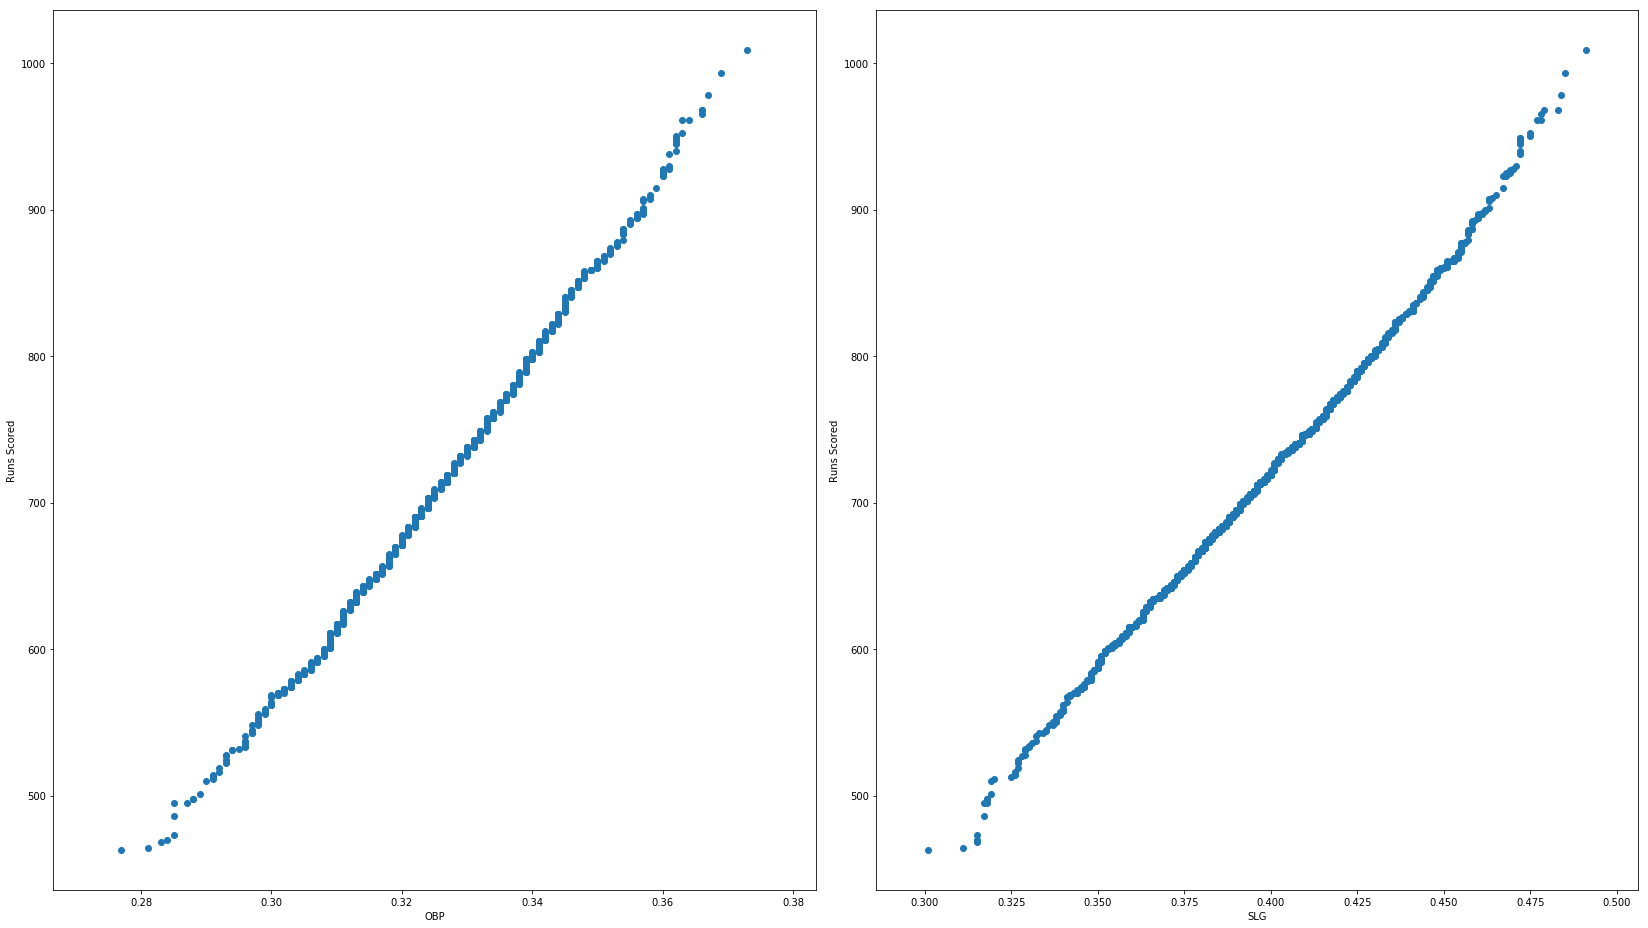

In [73]:
from numpy.polynomial.polynomial import polyfit

plt.rcParams['figure.figsize'] = (23,13)
fig,ax = plt.subplots(nrows=1,ncols=2)
y_ax = 0
for col in X_RS.columns:
    x_sort = sorted(X_RS[col].values)
    y_sort = sorted(y_RS.values)
    ax[y_ax].scatter(x_sort,y_sort)
    ax[y_ax].set_ylabel("Runs Scored")
    ax[y_ax].set_xlabel("{}".format(col))
    y_ax += 1
    
fig.tight_layout()
plt.show()

In [74]:
# create train and test set for RS
from sklearn.model_selection import train_test_split
XRS_train,XRS_test,yRS_train,yRS_test = train_test_split(X_RS,y_RS,test_size=0.2)

In [75]:
# fit linear regression to RS dataset
from sklearn.linear_model import LinearRegression
regr_RS = LinearRegression()
regr_RS.fit(XRS_train,yRS_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# evaluating model performance (RS)
print("Coefficients:\n",regr_RS.coef_)
print("\nIntercept:\n",regr_RS.intercept_)
print("\nR-squared:\n",regr_RS.score(XRS_test,yRS_test))

Coefficients:
 [2863.92699101 1497.20200748]

Intercept:
 -813.6159035969362

R-squared:
 0.9335144993495187


In [77]:
# check for possible overfitting using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator=regr_RS,X=X_RS,y=y_RS,cv=10)
print(cvs)

[0.88723779 0.8594984  0.90091554 0.91009584 0.88282275 0.87077994
 0.88897292 0.90926539 0.93108306 0.87399707]


In [78]:
RS_pred = regr_RS.predict([[0.345,0.439]])
print("RS (prediction): ",RS_pred)

RS (prediction):  [831.71058959]


In [79]:
# using Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
# RS
rf_regr_RS = RandomForestRegressor(n_estimators=100)
rf_regr_RS.fit(XRS_train,yRS_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
print("RS Cross Validation Score:\n",cross_val_score(rf_regr_RS,X_RS,y_RS,cv=10))

RS Cross Validation Score:
 [0.84348066 0.83537325 0.88140919 0.88190595 0.85232606 0.82780104
 0.84897553 0.87043127 0.89986673 0.85706632]


In [81]:
print("RS (R^2): ",rf_regr_RS.score(XRS_test,yRS_test))

RS (R^2):  0.9047495365680583


In [82]:
rf_RS_pred = rf_regr_RS.predict([[0.345,0.439]])
print(rf_RS_pred)

[860.47]


In [83]:
# tuning hyperparameters practice
# Random Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#Number of features to consider at every split
max_features = ["auto","sqrt"]
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#Method of selecting samples for training each tree
bootstrap = [True,False]

#Create the random grid
random_grid = {"n_estimators":n_estimators,
               "max_features":max_features,
               "max_depth":max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf,
               "bootstrap":bootstrap}

In [84]:
# The random grid to search for best hyperparameters
# random search of parameters, using 3-fold cross validation
# search across 100 different combinations (n_iter =100)

rf_random = RandomizedSearchCV(estimator = rf_regr_RS,param_distributions = random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

# fit the random search model
rf_random.fit(XRS_train,yRS_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, mi

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.9s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   3.2s
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   3.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000,

[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, total=   4.4s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.7s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.7s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   3.7s
[CV] n_estimators

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, mi

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.2s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimato

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   0.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   2.8s
[CV] n_estima

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.7s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, 

[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   5.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   2.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.4s
[CV] n_estimators=40

[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   0.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   1.1s
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [85]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [86]:
# evaluate random search
def evaluate(model,test_features,test_labels):
    predictions = model.predict(XRS_test)
    errors = abs(predictions-yRS_test)
    mape = 100*np.mean(errors/yRS_test)
    accuracy = 100 - mape
    print("Model Performance")
    print("Average Error: {:0.4f} degrees.".format(np.mean(errors)))
    print("Accuracy = {:0.2f}%".format(accuracy))
    return accuracy

In [87]:
base_accuracy = evaluate(rf_regr_RS,XRS_test,yRS_test)
print(base_accuracy)

Model Performance
Average Error: 23.5947 degrees.
Accuracy = 96.60%
96.59935058308173


In [88]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,XRS_test,yRS_test)
print(random_accuracy)

Model Performance
Average Error: 20.6057 degrees.
Accuracy = 97.03%
97.02599901707907


In [89]:
print("Improvement of {:0.2f}%".format(100*(random_accuracy-base_accuracy)/base_accuracy))

Improvement of 0.44%


In [90]:
# grid search w/ cross validation
from sklearn.model_selection import GridSearchCV

# create parameter grid based on the results of random search
param_grid = {
    "bootstrap":[True],
    "max_depth":[100,110,120,130],
    "min_samples_leaf":[3,4,5],
    "min_samples_split":[8,10,12],
    "n_estimators":[100,200,300,1000]
}

grid_search = GridSearchCV(estimator = rf_regr_RS,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

In [91]:
grid_search.fit(XRS_train,yRS_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_sample

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s


[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=4, min_

[CV]  bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=100, min_samples_leaf=5, min_sample

[CV]  bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.4s
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV] bootstrap=True, max_depth=110, min_samples_leaf=3, min_samples

[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s


[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=4, min_samp

[CV]  bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=110, min_samples_leaf=5, min

[CV]  bootstrap=True, max_depth=110, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=3, mi

[CV]  bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=4, min_

[CV]  bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.2s
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.1s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV] bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=120, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=120, min_samples_leaf=5, min_s

[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.0s


[CV] bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=4, min_samples_split=

[CV] bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.2s
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=130, min_samples_leaf=5, min_samples_split=8, n_es

[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   52.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [100, 110, 120, 130], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [92]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [93]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,XRS_test,yRS_test)

Model Performance
Average Error: 21.0029 degrees.
Accuracy = 96.97%


In [94]:
print("Improvement of {:0.2f}%".format(100*(grid_accuracy-base_accuracy)/base_accuracy))

Improvement of 0.38%


In [96]:
# random search is more efficient than grid-search for smaller feature models (apply to updated version of RandomForestRegressor model)
rf_regr_RS2 = RandomForestRegressor(bootstrap= True,
                                    max_depth= 90,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 4,
                                    min_samples_split= 10,
                                    n_estimators= 400)
rf_regr_RS2.fit(XRS_train,yRS_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
print("RS Cross Validation Score:\n",cross_val_score(rf_regr_RS2,X_RS,y_RS,cv=10))

RS Cross Validation Score:
 [0.87854632 0.85917897 0.90081952 0.90709333 0.87575439 0.85726878
 0.87712108 0.90431435 0.91172178 0.88411188]


In [98]:
print("RS (R^2): ",rf_regr_RS2.score(XRS_test,yRS_test))

RS (R^2):  0.9254114936339682


In [99]:
rf_RS_pred = rf_regr_RS2.predict([[0.345,0.439]])
print(rf_RS_pred)

[839.22922251]
